In [2]:
import csv
import gzip

import matplotlib.pyplot as plt

In [17]:
with gzip.open('data/data_anon_76k.csv.gz', 'rt') as f:
    reader = csv.DictReader(f)
    objs = list(reader)

In [5]:
all_plates = set([x['car_id'] for x in objs])

In [7]:
print('total tickets:', len(objs))
print('unique plates:', len(all_plates))
print('total money:', sum([float(x['amount']) for x in objs]))

total tickets: 76352
unique plates: 15804
total money: 6036978.579999997


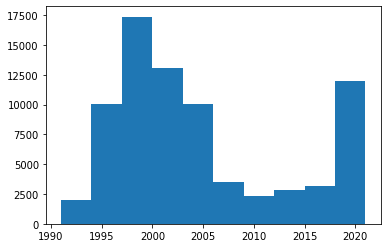

In [8]:
years = [int(x['year']) for x in objs]
plt.hist(years)
plt.show()

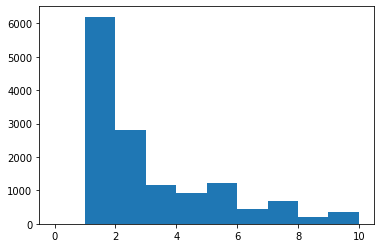

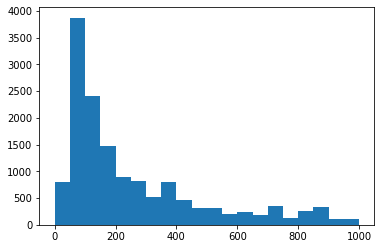

plate with max tickets: 8188 434


In [9]:
counts = {x: 0 for x in all_plates}
money = {x: 0 for x in all_plates}
for ticket in objs:
    counts[ticket['car_id']] += 1
    money[ticket['car_id']] += float(ticket['amount'])
plt.hist(counts.values(), range=(0, 10), bins=10)
plt.show()
plt.hist(money.values(), range=(0, 1000), bins=20)
plt.show()

# Find the plate with the most tickets.
max_tickets = max(counts.values())
for plate, count in counts.items():
    if count == max_tickets:
        print('plate with max tickets:', plate, max_tickets)

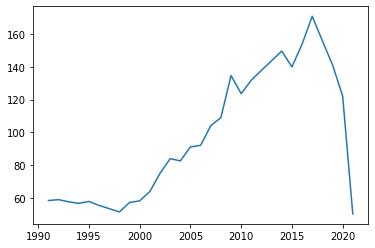

In [10]:
year_amounts = {x: [] for x in range(1991, 2022)}
for obj in objs:
    year = int(obj['year'])
    year_amounts[year].append(float(obj['amount']))
plt.plot(year_amounts.keys(), [sum(x)/len(x) for x in year_amounts.values()])
plt.show()

In [12]:
def sorted_counts(objs):
    counts = {x: 0 for x in set(objs)}
    for x in objs:
        counts[x] += 1
    for name, count in sorted(counts.items(), key=lambda x: x[1])[::-1]:
        print(f'{count: 5} {name}')

In [13]:
sorted_counts([obj['violation'] for obj in objs])

 20725 METER EXPIRED
 10120 STOPPING PROHIBITED
 8059 PARKING PROHIBITED
 4626 OVER TIME LIMIT
 3503 FIRE HYDRANT
 3319 SIDEWALK
 3254 METER EXPIRED CC
 2660 BUS ONLY ZONE
 2473 EXPIRED INSPECTION
 2263 PHOTO RED LIGHT
 2206 DOUBLE PARKED
 1232 CORNER CLEARANCE
 1192 LOADING ZONE
 1122 STOP PROHIBITED CC
  955 STORAGE FEE AUCTION
  846 HP RESERVED SPACE
  775 PARKING PROHBITED
  710 SPEED CAMERA VIOLATION
  556 CROSSWALK
  521 BLOCKING DRIVEWAY
  518 PARKING PROHBITED CC
  480 PASSENGR LOADNG ZONE
  414 PARK HP SPACE    13
  389 EXPIRED TAG
  351 HP RAMP BLOCKED
  285 PRIVATE PROPERTY
  256 TOW FEE AUCTION
  240 STREET CLEANING
  237 UNREG/ABANDONED VEH
  211 IMPROPER ON 2WAY HWY
  201 BLOCKNG MASS TRANSIT
  162 OVER TIME LIMIT CC
  136 TAXI STAND
  130 BUS ONLY ZONE   CC
  107 SNOW EMERGENCY ROUTE
   88 DOUBLE PARKED  CC
   74 STOP MEDIAL STRIP
   72 SCHOOL ZONE
   67 IMPROPER ON 1WAY HWY
   59 UNATTENDED VEH    29
   58 LOADING ZONE CC
   57 PARKED ON GRASS
   53 1379-PROCESSING FEE


In [15]:
sorted_counts([obj['vehicle_make'] for obj in objs])

 9371 FORD
 7293 CHRY
 6172 CHEV
 5423 DODG
 5251 NISS
 3945 
 3867 PLYM
 2606 TOYT
 2539 BENZ
 2357 MERC
 2027 JEEP
 1827 PONT
 1746 OLDS
 1519 HOND
 1479 HYUN
 1332 KIA
 1258 UNKN
 1169 BUIC
 1102 NISSAN
  908 BUICK
  748 MITS
  739 CADI
  671 CHEVROLET
  659 DODGE
  649 TOYOTA
  632 MAZD
  626 LINC
  551 HYUNDAI
  537 MERZ
  517 VOLK
  410 BMW
  384 GMC
  318 ACUR
  311 VOLV
  303 NEON
  280 SATU
  274 EAGL
  272 HONDA
  270 AUDI
  267 SUBA
  244 CHRYS
  232 INFI
  231 CHRYSLER
  226 LEXU
  184 MAZDA
  170 ISUZ
  165 GEO
  155 MITSUBISHI
  144 VOLKSWAGEN
  133 CHEVY
  105 MERCEDES BENZ
   95 EAGLE
   90 SAAB
   85 AMC
   84 VOLVO
   72 INFINITI
   69 JAGU
   64 CADILLAC
   46 PONTI
   45 SUZU
   45 UPS
   43 SUBARU
   36 SUBAR
   34 OLDSM
   33 INTL
   33 DATS
   32 ACURA
   29 FEDEX
   28 ROVE
   28 HUMM
   28 CONC
   25 TOYOT
   24 HYUND
   23 RENA
   20 ISUZU
   20 NISSA
   20 PLYMO
   20 LEXUS
   19 CHEVR
   19 MERCU
   15 INTERNATIONAL
   14 CARY
   14 KIV
   14 FEDE
   13 PEUG

In [16]:
sorted_counts([obj['month']+'/'+obj['day'] for obj in objs])

  627 2/5
  623 2/9
  618 2/12
  607 2/10
  585 2/8
  562 2/4
  561 2/11
  557 2/6
  540 1/29
  484 1/30
  469 1/28
  342 5/2
  318 2/13
  305 1/31
  298 2/3
  296 8/20
  290 3/29
  288 9/14
  286 4/23
  279 11/13
  279 3/21
  278 11/17
  277 1/24
  277 7/28
  276 3/10
  276 11/15
  275 4/3
  271 12/2
  270 10/2
  266 4/25
  265 5/29
  265 6/17
  261 6/20
  260 5/8
  257 8/22
  256 8/14
  255 11/9
  254 3/5
  254 2/25
  252 2/23
  251 1/11
  250 1/15
  250 6/11
  248 8/13
  246 12/4
  246 6/3
  246 9/29
  245 7/14
  245 9/9
  245 1/21
  245 5/17
  243 3/22
  242 4/12
  241 7/27
  241 4/10
  240 5/30
  240 4/15
  240 8/30
  239 3/6
  239 6/27
  238 4/19
  237 8/19
  237 8/24
  237 12/16
  236 3/20
  235 10/16
  235 10/30
  235 12/3
  235 8/10
  235 10/29
  233 2/1
  232 6/5
  232 11/20
  231 3/7
  231 1/25
  230 7/23
  230 3/3
  230 4/28
  229 8/21
  229 4/6
  229 4/7
  229 1/27
  229 3/11
  229 5/22
  228 12/23
  228 8/8
  228 6/6
  227 7/1
  227 12/1
  227 2/18
  226 9/18
  226 7/7
  